<a href="https://colab.research.google.com/github/euanmcknight/Data-Science-Nanodegree-Project-1/blob/main/Data_Science_Nanodegree_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Nanodegree Project 1

## CRISP-DM Process


### Business Understanding

This notebook will aim to answer the following business questions:

1. How does the location of a property impact its price and/or review score?
2. Are AirBnb prices and review scores in Seattle seasonal?
3. What property characteristics are observed in properties with larger prices and/or review scores?


### Data Understanding

To better understand the data and how we can answer the above business questions, we will import and explore each of the three datasets.  

In [2]:
# Import in relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [3]:
# Load in the data
calendar_df = pd.read_csv('/content/calendar.csv')
listings_df = pd.read_csv('/content/listings.csv')
reviews_df = pd.read_csv('/content/reviews.csv')

In [4]:
# View the calendar data
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
# View the dimensions of the calendar data
calendar_df.shape

(1393570, 4)

In [6]:
# View the number of unique listings
len(calendar_df['listing_id'].unique())

3818

The calendar dataset contains information soley on the date, availability and price of a property. There are 636,565 rows in this dataset, although there are only 1,746 unique listings. Some listings appear multiple times as they are listed multiple times.

In [7]:
# View the listings data
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
# List the columns in the data
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [9]:
# View the dimensions of the data
listings_df.shape

(3818, 92)

In [10]:
# View the number of unique listings in the data
len(listings_df['id'].unique())

3818

In [11]:
# View the number of unique hosts in the data
len(listings_df['host_id'].unique())

2751

The listings dataset contains information about the property itself and the characteristics of the host. There are, however, far fewer rows in this dataset (3,818) than the calendar dataset. This is because there are multiple entries for the same property in the calendars data (as you would expect, since you would hope that a property has been leased more than once), whilst each property in the listings data is unique.

In [12]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [13]:
reviews_df.shape

(84849, 6)

In [14]:
len(reviews_df['listing_id'].unique())

3191

The review dataset contains 84,849 reviews on 3,191 properties.

Note that each of these datsets contains a listing id. We will use this at a later stage to combine the datasets where appropriate. We need to consider the missing values in each dataset before we can begin preparing our data to answer the business questions.

In [15]:
# Calculate the percentage of missing values in each column
missing_percentage_calendar = (calendar_df.isnull().sum() / len(calendar_df)) * 100

# Display the percentage of missing values in each column
print("Percentage of missing values in each column:")
print(missing_percentage_calendar)

Percentage of missing values in each column:
listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64


This tells us that ~33% of listings have no price attributed to them.

In [16]:
# Calculate the percentage of missing values in each column
missing_percentage_listings = (listings_df.isnull().sum() / len(listings_df)) * 100

# Display the percentage of missing values in each column
print("Percentage of missing values in each column:")
print(missing_percentage_listings)

Percentage of missing values in each column:
id                                   0.000000
listing_url                          0.000000
scrape_id                            0.000000
last_scraped                         0.000000
name                                 0.000000
                                      ...    
cancellation_policy                  0.000000
require_guest_profile_picture        0.000000
require_guest_phone_verification     0.000000
calculated_host_listings_count       0.000000
reviews_per_month                   16.422211
Length: 92, dtype: float64


This is difficult to gather insight from due to the number of columns. Let's exclude columns with at least 10% missing values and plot the percentage of missing data.

<Axes: >

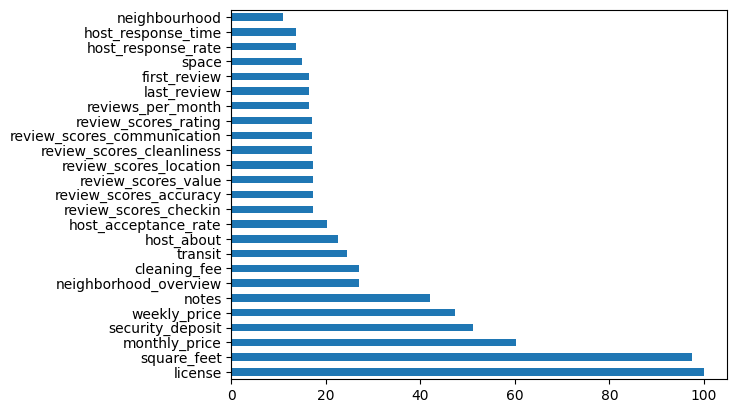

In [17]:
listings_missing = missing_percentage_listings[missing_percentage_listings > 10]
listings_missing.sort_values(ascending=False).plot(kind='barh')

There is no information (or almost no information) available for the license or square footage of the property and more than 40% of the values are missing for the monthly price, security deposit, weekly price and notes. These must be dealt with accordingly in data preparation.

In [18]:
# Calculate the percentage of missing values in each column
missing_percentage_reviews = (reviews_df.isnull().sum() / len(reviews_df)) * 100

# Display the percentage of missing values in each column
print("Percentage of missing values in each column:")
print(missing_percentage_reviews)

Percentage of missing values in each column:
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.021214
dtype: float64


A very small percentage of the comments are missing in the reviews data.

### Data Prepration

We prepare the data for data modelling by merging the data into one dataset using the listing ID, removing rows and columns that are not required for the anlysis and converting columns into the correct format.

We start by looking at which columns are relevant to our analysis. Despite the fullness of the dataset, the reviews data does not help us answer the business questions, so we disregard it going forward. To simplify our analysis we only consider numeric, categorical and date variables that answer the business questions.

To answer the business question we require columns related to time of year, price, review score and basic property details (i.e number of bedrooms, bathrooms etc).  

In [19]:
# List the columns in the calendar data frame
calendar_df.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [20]:
# Exclude the 'available' column
calendar_df_new = calendar_df[['listing_id', 'date', 'price']]

We retain each column in the calendar data frame aside from the 'available' column.

In [22]:
# List the columns in the listing data frame
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

From this data frame, we retain the following variables: id, neighbourhood_cleansed, property_type, accommodates, bathrooms, bedrooms, beds, review_scores_rating.

In [23]:
# Select only the relevant columns
listing_df_new = listings_df[['id', 'neighbourhood_cleansed', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]

Merge this data into one data frame for analysis.

In [24]:
# Rename the calendar id variable to maintain consistency
calendar_df_new.rename(columns={'listing_id': 'id'}, inplace=True)

# Merge the data frames on the id variable
df = pd.merge(calendar_df_new, listing_df_new, on = 'id')

<ipython-input-24-38e0d7f2ce2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_df_new.rename(columns={'listing_id': 'id'}, inplace=True)


Remove columns with no price or review score.

In [25]:
# Remove columns with no price or score
df = df.dropna(subset=['price', 'review_scores_rating'])

In [26]:
# Check the null values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790005 entries, 0 to 1392474
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      790005 non-null  int64  
 1   date                    790005 non-null  object 
 2   price                   790005 non-null  object 
 3   neighbourhood_cleansed  790005 non-null  object 
 4   property_type           790005 non-null  object 
 5   accommodates            790005 non-null  int64  
 6   bathrooms               786357 non-null  float64
 7   bedrooms                788002 non-null  float64
 8   beds                    790005 non-null  float64
 9   review_scores_rating    790005 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 66.3+ MB


We need to convert the date into a date variable and seperate into months to analyse seasonal effects. Additionally, we convert the price into a float.

In [27]:
# Convert date to a date type and seperate months
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()

# Remove the '$' sign and commas, then convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

The bathrooms and bedrooms columns contain a small number of missing values. We elect to impute the mode of these columns here to ensure integers are maintained in this column (since we cannot have half a bathrrom or half a bedrrom).

In [28]:
# Fill the missing values with the mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])

We suspect that some of the numeric explanatory variables may be highly correlated. This may distort our analysis so we should remove one variable from a highly correlated pair.

<ipython-input-29-e225dad8cc96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


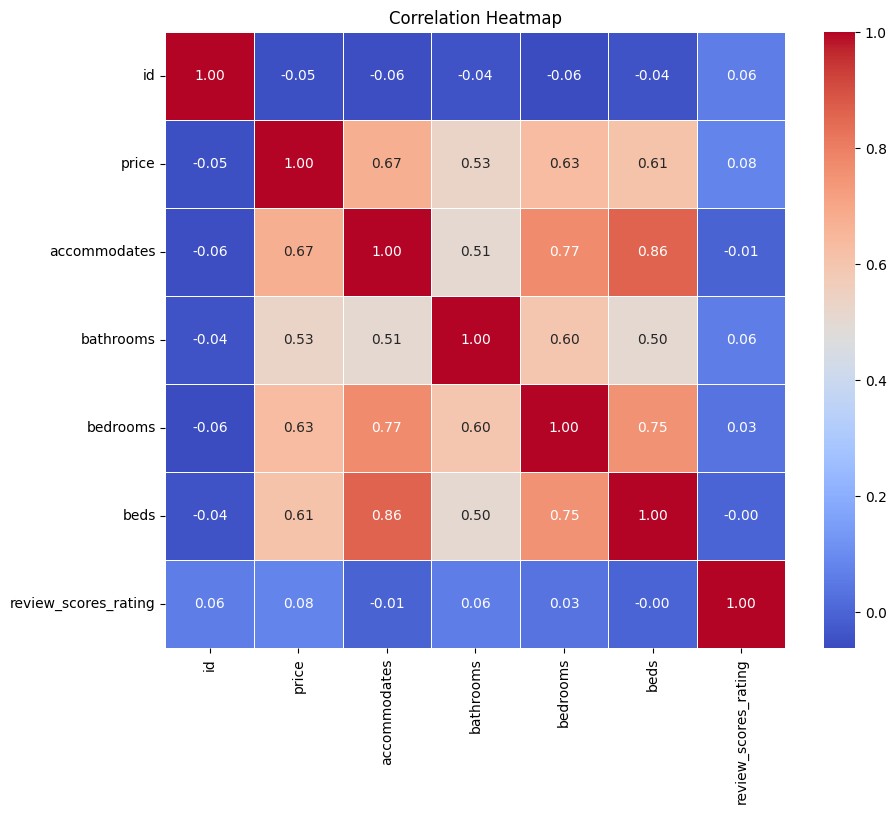

In [29]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Accomodates, bathrooms, bedrooms and beds are all highly correlated with one another. I have elected to retain accomodate and drop the other variables as I feel this best encapsulates the characteristics of a property.

In [30]:
# Drop the bathrooms, bedrooms and beds columns
df = df.drop(columns=['bathrooms', 'bedrooms', 'beds'])

### Data visualisations

Before we fit our linear models, let us consider the general trends observed relating our explanatory variables to each response.

In [31]:
# List the columns of the combined data frame
df.columns

Index(['id', 'date', 'price', 'neighbourhood_cleansed', 'property_type',
       'accommodates', 'review_scores_rating', 'month'],
      dtype='object')

####Price

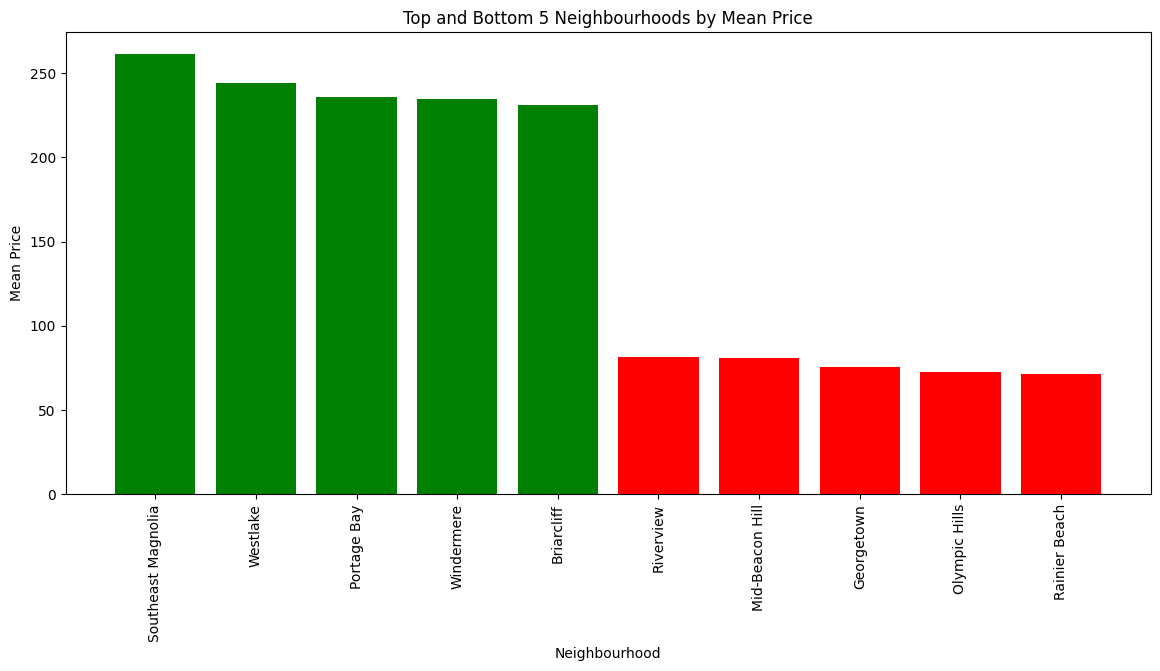

In [39]:
# Calculate the mean price for each neighbourhood
mean_price_by_neighbourhood = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Sort the DataFrame by mean price in descending order
mean_price_by_neighbourhood = mean_price_by_neighbourhood.sort_values(by='price', ascending=False)

# Select the top and bottom 10 neighbourhoods
top_5_neighbourhoods = mean_price_by_neighbourhood.head(5)
bottom_5_neighbourhoods = mean_price_by_neighbourhood.tail(5)

# Concatenate the DataFrames
combined_neighbourhoods = pd.concat([top_5_neighbourhoods, bottom_5_neighbourhoods])

# Create a bar chart for the combined neighbourhoods with rotated x-axis labels
plt.figure(figsize=(14, 6))
bars = plt.bar(combined_neighbourhoods['neighbourhood_cleansed'], combined_neighbourhoods['price'], color=['green']*5 + ['red']*5)
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.title('Top and Bottom 5 Neighbourhoods by Mean Price')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

plt.show()

There appears to be a large difference on the average price of an AirBnB dependent on the neighbourhood the property is located in.

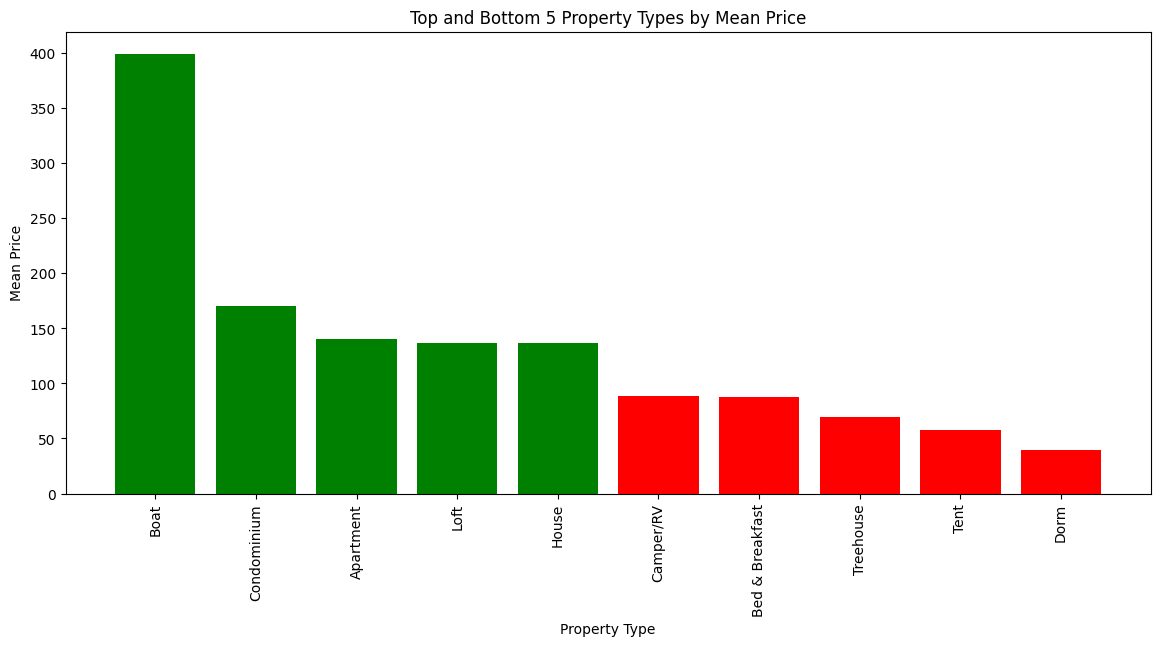

In [40]:
# Calculate the mean price for each property type
mean_price_by_property_type = df.groupby('property_type')['price'].mean().reset_index()

# Sort the DataFrame by mean price in descending order
mean_price_by_property_type = mean_price_by_property_type.sort_values(by='price', ascending=False)

# Select the top and bottom 10 property types
top_5_property_types = mean_price_by_property_type.head(5)
bottom_5_property_types = mean_price_by_property_type.tail(5)

# Concatenate the DataFrames
combined_property_types = pd.concat([top_5_property_types, bottom_5_property_types])

# Define colors for top 5 and bottom 5 property types
colors = ['green']*5 + ['red']*5

# Create a bar chart for the combined property types with rotated x-axis labels
plt.figure(figsize=(14, 6))
plt.bar(combined_property_types['property_type'], combined_property_types['price'], color=colors)
plt.xlabel('Property Type')
plt.ylabel('Mean Price')
plt.title('Top and Bottom 5 Property Types by Mean Price')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

There appears to be a some differences between the prices of a property dependent on the property type. This is most stark when the property is a Boat.

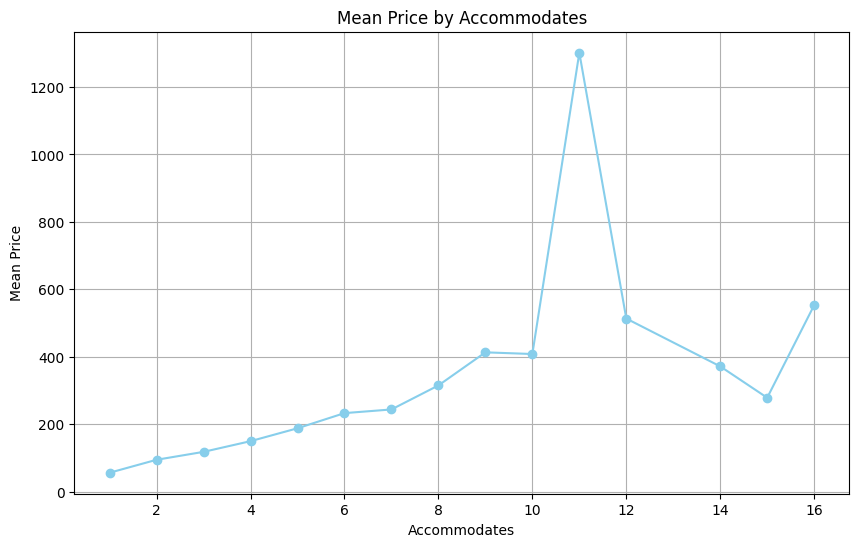

In [41]:
# Group by 'accommodates' and calculate the mean price
mean_price_by_accommodates = df.groupby('accommodates')['price'].mean().reset_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_accommodates['accommodates'], mean_price_by_accommodates['price'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Accommodates')
plt.ylabel('Mean Price')
plt.title('Mean Price by Accommodates')
plt.grid(True)
plt.show()

The price of a property tends to increase as tthe number of Accomodates increases. However, the relationship appears to be non-linear and there appears to be a significant outlier at accomodates = 11. This may mean the relationship is not captured correctly in a linear model.

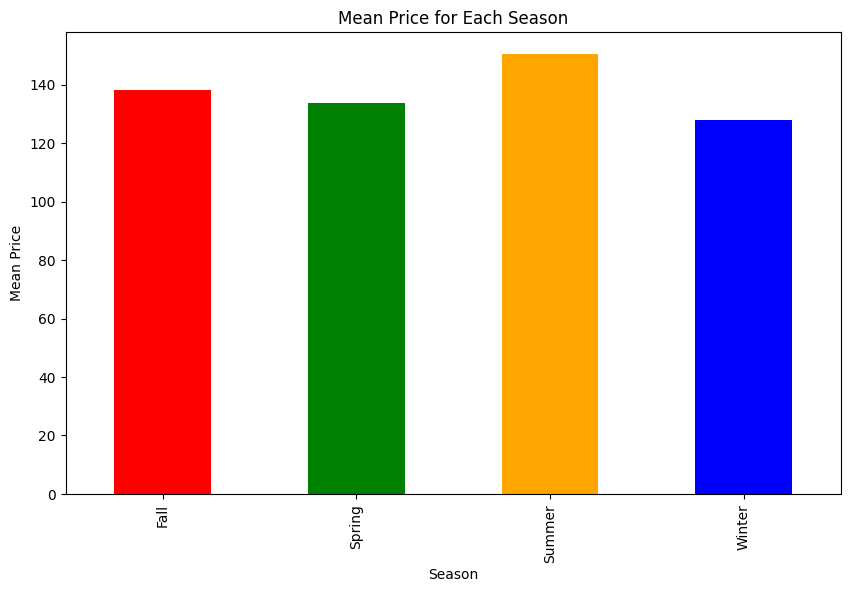

In [43]:
# Define the custom order of months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to Categorical with custom order
df['month'] = pd.Categorical(df['month'], categories=custom_order, ordered=True)

# Create a mapping of months to seasons
season_mapping = {
    'December': 'Winter',
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall'
}

# Map the 'month' column to the corresponding season
df['season'] = df['month'].map(season_mapping)

# Calculate the mean price for each season
mean_price_by_season = df.groupby('season')['price'].mean()

# Define color palette for each season
season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'orange', 'Fall': 'red'}

# Create a bar chart with the specified color palette
plt.figure(figsize=(10, 6))
mean_price_by_season.plot(kind='bar', color=mean_price_by_season.index.map(season_colors))
plt.xlabel('Season')
plt.ylabel('Mean Price')
plt.title('Mean Price for Each Season')
plt.show()

There does seem to be a slightly higher mean price during the summer months so it could be argued that the mean price is seasonal.

#### Review Score

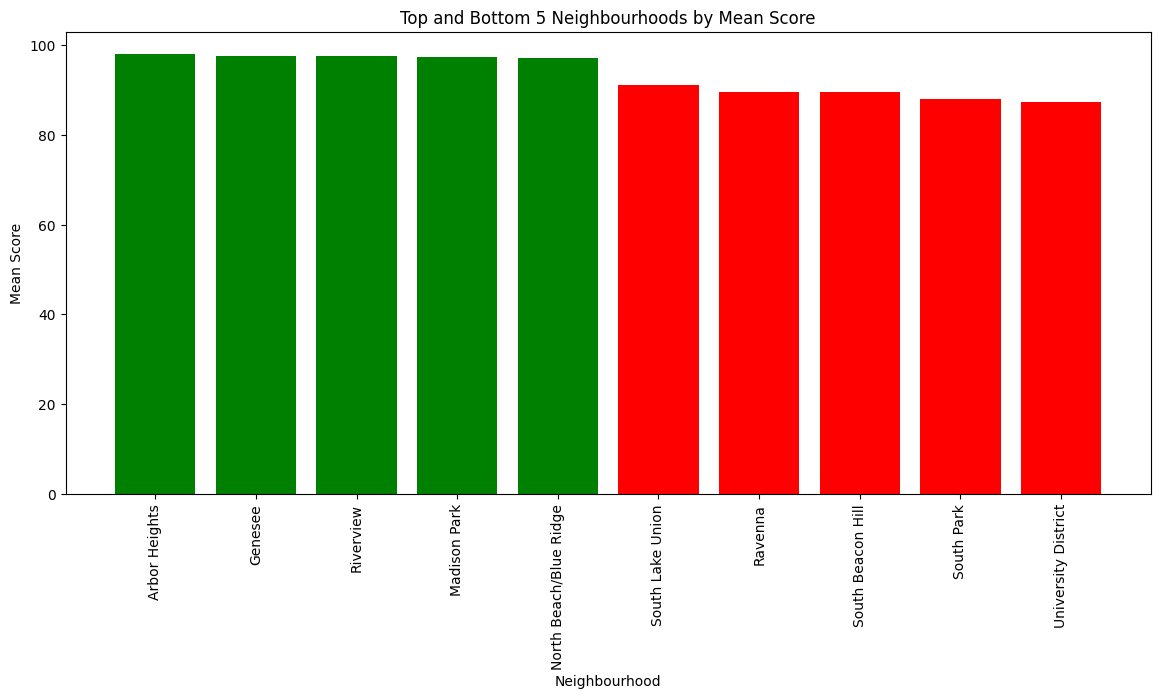

In [44]:
# Calculate the mean score for each neighbourhood
mean_score_by_neighbourhood = df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().reset_index()

# Sort the DataFrame by mean score in descending order
mean_score_by_neighbourhood = mean_score_by_neighbourhood.sort_values(by='review_scores_rating', ascending=False)

# Select the top and bottom 10 neighbourhoods
top_5_neighbourhoods = mean_score_by_neighbourhood.head(5)
bottom_5_neighbourhoods = mean_score_by_neighbourhood.tail(5)

# Concatenate the DataFrames
combined_neighbourhoods = pd.concat([top_5_neighbourhoods, bottom_5_neighbourhoods])

# Create a bar chart for the combined neighbourhoods with rotated x-axis labels
plt.figure(figsize=(14, 6))
colors = ['green'] * 5 + ['red'] * 5
plt.bar(combined_neighbourhoods['neighbourhood_cleansed'], combined_neighbourhoods['review_scores_rating'], color=colors)
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Score')
plt.title('Top and Bottom 5 Neighbourhoods by Mean Score')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

There does not seem to be as clear a difference between neighbourhoods when it comes to review score, although slight differences across neighbourhoods can observed.

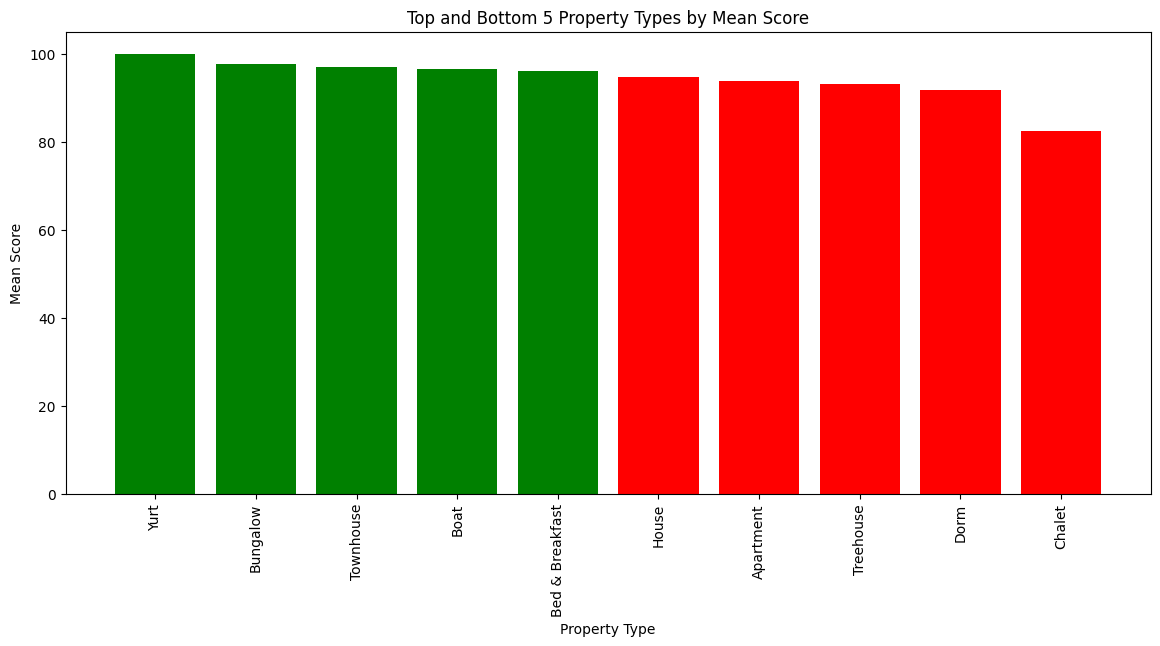

In [45]:
# Calculate the mean score for each property type
mean_score_by_property_type = df.groupby('property_type')['review_scores_rating'].mean().reset_index()

# Sort the DataFrame by mean score in descending order
mean_score_by_property_type = mean_score_by_property_type.sort_values(by='review_scores_rating', ascending=False)

# Select the top and bottom 10 property types
top_5_property_types = mean_score_by_property_type.head(5)
bottom_5_property_types = mean_score_by_property_type.tail(5)

# Concatenate the DataFrames
combined_property_types = pd.concat([top_5_property_types, bottom_5_property_types])

# Create a bar chart for the combined property types with rotated x-axis labels
plt.figure(figsize=(14, 6))
colors = ['green'] * 5 + ['red'] * 5
plt.bar(combined_property_types['property_type'], combined_property_types['review_scores_rating'], color=colors)
plt.xlabel('Property Type')
plt.ylabel('Mean Score')
plt.title('Top and Bottom 5 Property Types by Mean Score')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

The property type similarly does not seem to have a large impact on the review score, aside from Chalets which seem to score significantly lower than other properties.

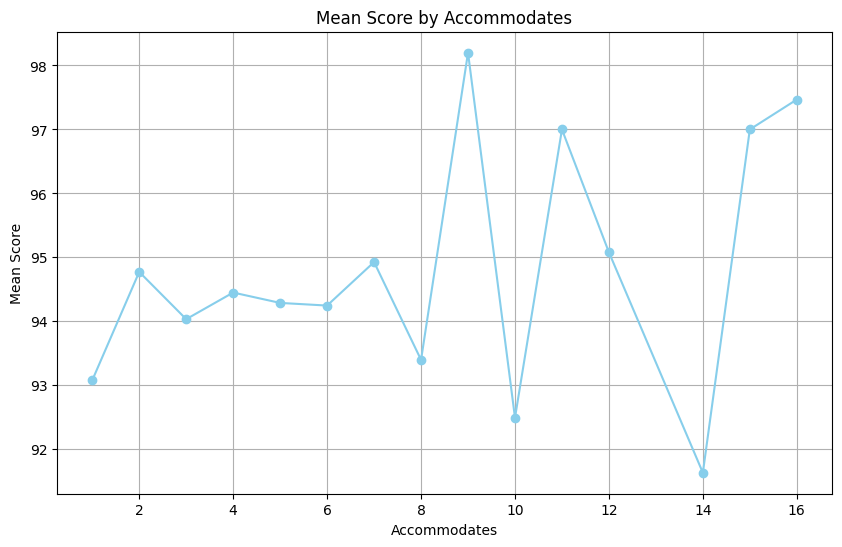

In [46]:
# Group by 'accommodates' and calculate the mean score
mean_score_by_accommodates = df.groupby('accommodates')['review_scores_rating'].mean().reset_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_score_by_accommodates['accommodates'], mean_score_by_accommodates['review_scores_rating'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Accommodates')
plt.ylabel('Mean Score')
plt.title('Mean Score by Accommodates')
plt.grid(True)
plt.show()

The number of people a property can accomodate appears to have no clear relationship with the mean review score.

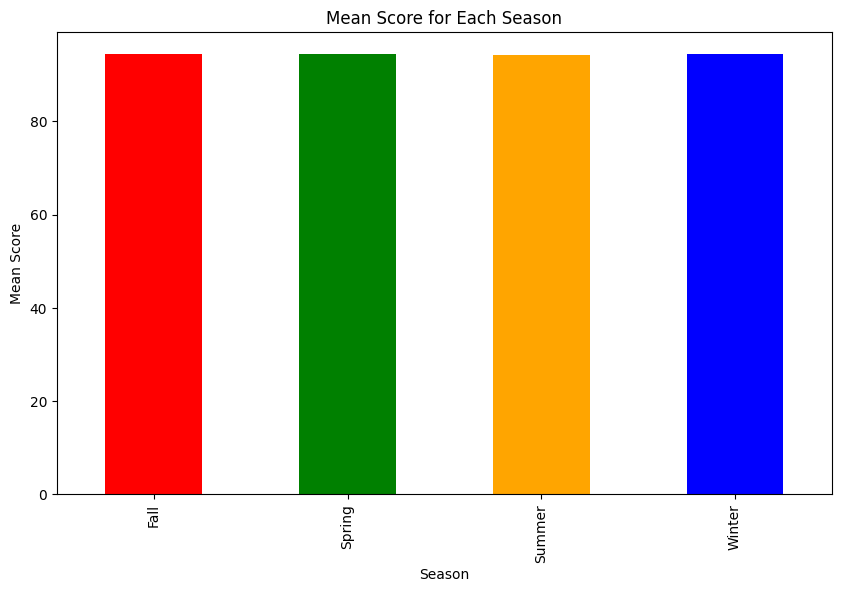

In [47]:
# Define the custom order of months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to Categorical with custom order
df['month'] = pd.Categorical(df['month'], categories=custom_order, ordered=True)

# Create a mapping of months to seasons
season_mapping = {
    'December': 'Winter',
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall'
}

# Map the 'month' column to the corresponding season
df['season'] = df['month'].map(season_mapping)

# Calculate the mean score for each season
mean_score_by_season = df.groupby('season')['review_scores_rating'].mean()

# Define color palette for each season
season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'orange', 'Fall': 'red'}

# Create a bar chart with the specified color palette
plt.figure(figsize=(10, 6))
mean_score_by_season.plot(kind='bar', color=mean_score_by_season.index.map(season_colors))
plt.xlabel('Season')
plt.ylabel('Mean Score')
plt.title('Mean Score for Each Season')
plt.show()

There appears to be no seasonal relationship with review score.

### Data Modelling

In [49]:
# Encode Categorical Variables
cat = df[['neighbourhood_cleansed', 'property_type', 'season']]
cat_encoded = pd.get_dummies(cat, drop_first=True)

# Drop original columns from data
num = df.drop(['date', 'neighbourhood_cleansed', 'property_type', 'season', 'month'], axis=1)

# Merge numeric and encoded categorical data
df_new = pd.concat([num, cat_encoded], axis=1)

df_new

,id,price,accommodates,review_scores_rating,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,...,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,season_Spring,season_Summer,season_Winter
0,241032,85.0,4,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,241032,85.0,4,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,241032,85.0,4,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,241032,85.0,4,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,241032,85.0,4,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392470,8902327,79.0,4,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1392471,8902327,125.0,4,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1392472,8902327,125.0,4,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1392473,8902327,79.0,4,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Let us fit a linear model with price as the response variable and another with review_scores_rating as the response variable.

#### Price

In [50]:
#Split into explanatory and response variables
X_price = df_new.drop(['id', 'price', 'review_scores_rating'], axis=1)
y_price = df_new['price']

#Split into train and test
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

price_model = LinearRegression() # Instantiate
price_model.fit(X_train_price, y_train_price) #Fit

LinearRegression()

In [51]:
# Calculate scores for the model
y_train_preds_price = price_model.predict(X_train_price)
y_test_preds_price = price_model.predict(X_test_price)

print('Price model MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_price, y_train_preds_price),
        mean_squared_error(y_test_price, y_test_preds_price)))
print('Price Model R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_price, y_train_preds_price),
        r2_score(y_test_price, y_test_preds_price)))

Price model MSE train: 5077.090, test: 5063.453
Price Model R^2 train: 0.553, test: 0.551


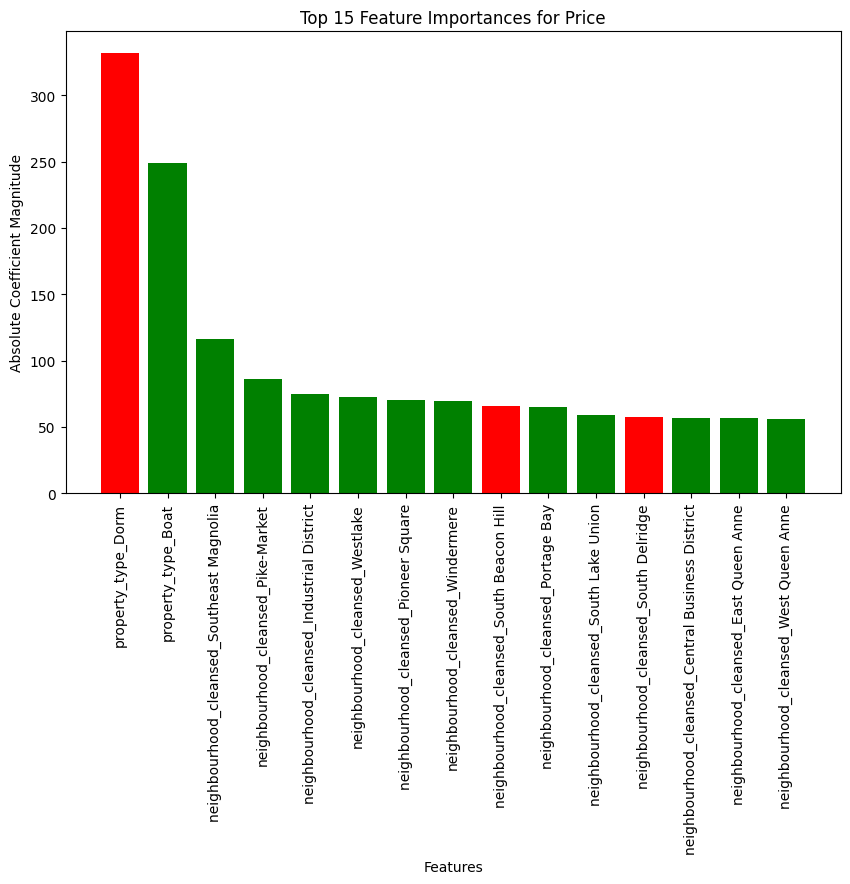

In [52]:
# Get the coefficients (feature importances)
coefficients_price = price_model.coef_

# Visualize feature importances
fig, ax = plt.subplots(figsize=(10, 6))

sorted_coefficients_price = sorted(zip(X_price.columns, coefficients_price), key=lambda x: abs(x[1]), reverse=True)[:15]

# Set green if the coefficient has a positive influence on the price, red otherwise
colors = ['green' if coef >= 0 else 'red' for (_, coef) in sorted_coefficients_price]

ax.bar([feature for feature, _ in sorted_coefficients_price], np.abs([coef for _, coef in sorted_coefficients_price]), color=colors)
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Coefficient Magnitude')
ax.set_title('Top 15 Feature Importances for Price')
ax.tick_params(axis='x', rotation=90)

#### Review score

In [53]:
#Split into explanatory and response variables
X_score = df_new.drop(['id', 'price', 'review_scores_rating'], axis=1)
y_score = df_new['review_scores_rating']

#Split into train and test
X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_score, y_score, test_size=0.2, random_state=42)

score_model = LinearRegression() # Instantiate
score_model.fit(X_train_score, y_train_score) #Fit

LinearRegression()

In [54]:
# Calculate scores for the model
y_train_preds_score = score_model.predict(X_train_score)
y_test_preds_score = score_model.predict(X_test_score)

print('Review score model MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_score, y_train_preds_score),
        mean_squared_error(y_test_score, y_test_preds_score)))
print('Review score Model R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_score, y_train_preds_score),
        r2_score(y_test_score, y_test_preds_score)))

Review score model MSE train: 36.977, test: 37.710
Review score Model R^2 train: 0.099, test: 0.100


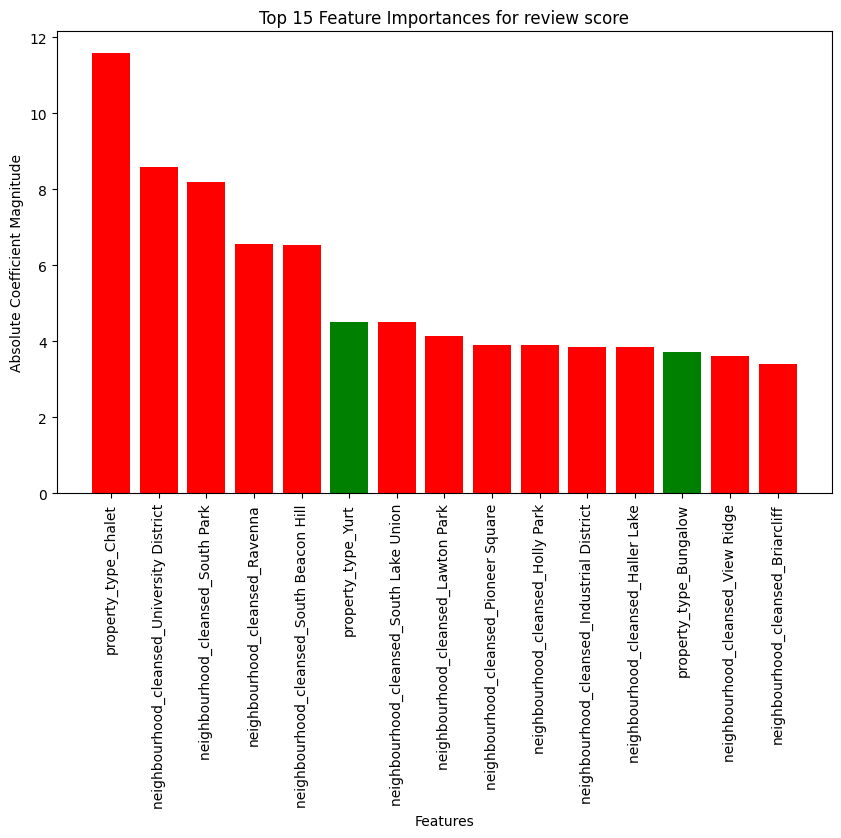

In [55]:
# Get the coefficients (feature importances)
coefficients_score = score_model.coef_

# Visualize feature importances
fig, ax = plt.subplots(figsize=(10, 6))

sorted_coefficients_score = sorted(zip(X_score.columns, coefficients_score), key=lambda x: abs(x[1]), reverse=True)[:15]

# Set green if the coefficient has a positive influence on the price, red otherwise
colors = ['green' if coef >= 0 else 'red' for (_, coef) in sorted_coefficients_score]

ax.bar([feature for feature, _ in sorted_coefficients_score], np.abs([coef for _, coef in sorted_coefficients_score]), color=colors)
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Coefficient Magnitude')
ax.set_title('Top 15 Feature Importances for review score')
ax.tick_params(axis='x', rotation=90)

### Results

**How does the location of a property impact its price and/or review score?**

The location of the property appears to be one of, if not the most, important features of a listing that determines its price and review score. The difference between the prices in each neighbourhood was quite evident in the initial bar chart and is confirmed by the linear model in which all but two of the 15 most influential features were neighbourhoods. The trend is less evident in the initial bar chart for review score but similarly all but 3 of the top 15 features for review score were neighbourhoods.

**Are AirBnb prices and review scores in Seattle seasonal?**

It could be argued that AirBnB prices are seasonal, but they are not the most important feature when it comes to determining the price of a listing. The bar chart suggests that prices are higher during the summer months, however none of the months imply are in the top 15 features of the linear model. There is no evidence to suggest that review scores are seasonal.

**What property characteristics are observed in properties with larger prices and/or review scores?**

Properties with larger prices appear to, as you might expect, accomodate more guests. However, the difference in the mean price was not as large as may have been expected and, in fact, it was not deemed to be one of the most top 15 features in the linear model. There did not appear to be any discernible characteristics of properties with larger review scores i.e the review score appears to have no relationship with the number of people a property can accomodate. Both the price and review score were influenced by the property type, with at least two property types featuring (prominently) in the top 15 features in each model.
